# Task: Develop a Time Series Forecasting Model and Deploy it as a Web Application


# BTC

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1: Data Collaction and exploration

- 1.1 Load The Dataset

In [24]:
df = pd.read_csv('coin_Bitcoin.csv', parse_dates=['Date'])
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [26]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2991 non-null   int64         
 1   Name       2991 non-null   object        
 2   Symbol     2991 non-null   object        
 3   Date       2991 non-null   datetime64[ns]
 4   High       2991 non-null   float64       
 5   Low        2991 non-null   float64       
 6   Open       2991 non-null   float64       
 7   Close      2991 non-null   float64       
 8   Volume     2991 non-null   float64       
 9   Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 233.8+ KB
None
               SNo                           Date          High           Low  \
count  2991.000000                           2991   2991.000000   2991.000000   
mean   1496.000000  2017-06-02 23:59:59.000000256   6893.326038   6486.009539  

In [5]:
print(f'total rowes:{df.shape[0]}')
print(f'total columns: {df.shape[1]}')

total rowes:2991
total columns: 10


- 1.2 Initial Exploration

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

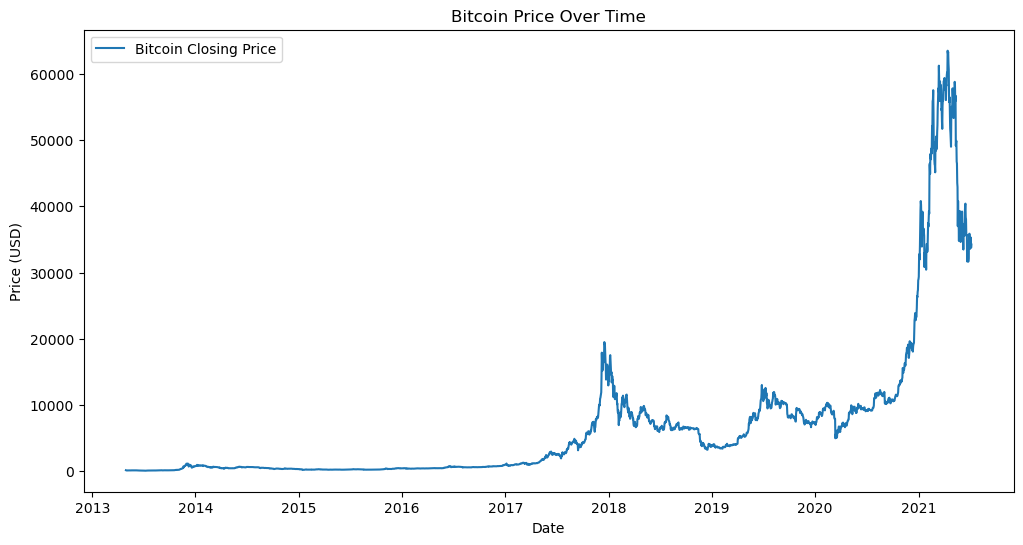

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Bitcoin Closing Price')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

- 1.3 Issue Identification:

In [8]:
#Check missing values
df.isnull().sum()

SNo          0
Name         0
Symbol       0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

- There is a no missing values

In [9]:
#check duplicate values
df.duplicated().sum()

0

In [32]:
print(df['Date'].diff().value_counts()) 

Date
1 days    2990
Name: count, dtype: int64


- There is no duplicated values

#  2: Data Cleaning and Transformation

- 2.1 Handle Missing Timestamps

In [10]:
df = df.resample('D').ffill()

- 2.2 Outlier Detection and Treatment

In [11]:
# use z-score analysis
from scipy.stats import zscore
df['z_score'] = zscore(df['Close'])
outliers = df[(df['z_score']>3)|(df['z_score']< -3)]
print(outliers)

             SNo     Name Symbol          High           Low          Open  \
Date                                                                         
2021-01-08  2812  Bitcoin    BTC  41946.739351  36838.635996  39381.765843   
2021-02-08  2843  Bitcoin    BTC  46203.931437  38076.322807  38886.827290   
2021-02-09  2844  Bitcoin    BTC  48003.723962  45166.960045  46184.991466   
2021-02-10  2845  Bitcoin    BTC  47145.568199  43881.152599  46469.761202   
2021-02-11  2846  Bitcoin    BTC  48463.467125  44187.762351  44898.711611   
...          ...      ...    ...           ...           ...           ...   
2021-05-15  2939  Bitcoin    BTC  50639.665328  46664.141871  49855.494650   
2021-05-16  2940  Bitcoin    BTC  49720.044622  43963.350186  46716.637988   
2021-05-17  2941  Bitcoin    BTC  46623.558228  42207.288106  46415.899254   
2021-05-18  2942  Bitcoin    BTC  45812.458408  42367.831453  43488.057988   
2021-05-20  2944  Bitcoin    BTC  42462.984986  35050.615825  36

In [12]:
# Replace outliers 
df['Close'] = df['Close'].mask((df['z_score'] > 3) | (df['z_score'] < -3)).interpolate()

- 2.3 Feature Engineering

In [13]:
# Extra time_based features
df['Day'] = df.index.day
df['Month'] = df.index.month
df['Year'] = df.index.year
df['Day_of_week'] = df.index.dayofweek 


- 2.4 Resampling regularization

In [14]:
df = df.asfreq('D')

# 3: Exploratory Data Analysis (EDA)

- 3.1 Visualizations

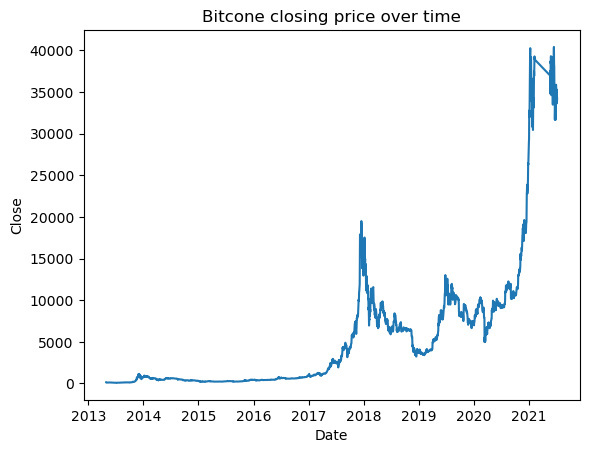

In [15]:
import seaborn as sns
sns.lineplot(data=df, x=df.index,y='Close')
plt.title('Bitcone closing price over time')
plt.show()


- 3.2 Statistical Analysis

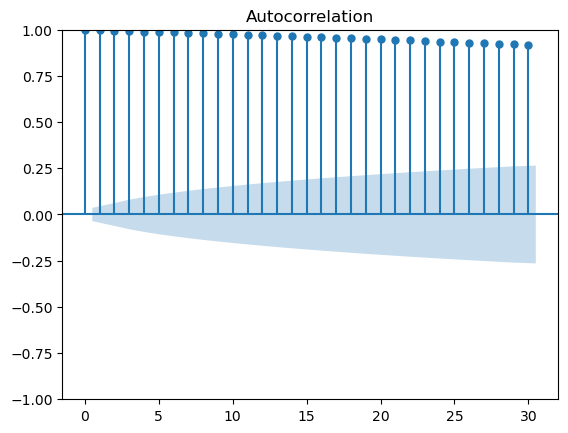

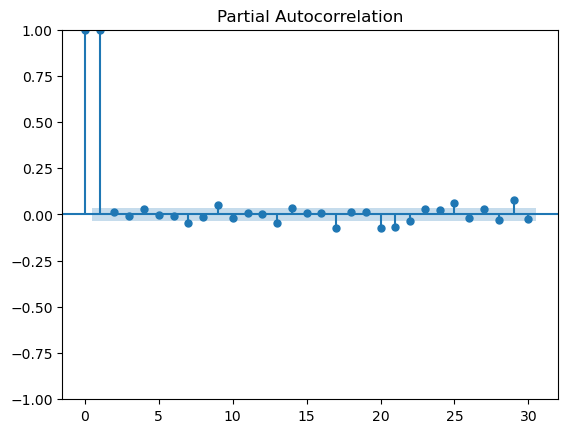

In [17]:
#Plot autocorrelation and partial autocorrelations
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df['Close'], lags=30)
plot_pacf(df['Close'], lags=30)
plt.show()

# 4: Model Development

- 4.1 Data Splitting:

In [18]:
train_size = int(len(df)*0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

- 4.2 Algorithm selection

In [19]:
#start with ARIMA or Prophet
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['Close'], order=(5, 1, 0))
model_fit = model.fit()

- 4.3 Model Tranning

In [20]:
print(len(test))

599


In [21]:
#Train the model
predictions = model_fit.forecast(steps=len('test'))

In [22]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(test['Close'], predictions, squared=False)
print('RMSE:', rmse)

c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [599, 4]

# 5:Model Optimization

- 5.1 Parameter tuning

In [ ]:
import itertools

p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_mae = float('inf')
best_order = None

for order in pdq:
    try:
        model = ARIMA(train['value'], order=order)
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=len(test))
        mae = mean_absolute_error(test['value'], forecast)
        if mae < best_mae:
            best_mae = mae
            best_order = order
    except:
        continue

print(f'Best ARIMA Order: {best_order}, MAE: {best_mae}')

Best ARIMA Order: None, MAE: inf


# 6:Model Deployment/Dashboard Creation

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt

st.title('Time Series Forecasting App')

# Load data
uploaded_file = st.file_uploader("Upload your time series data", type="csv")
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    # Display data
    st.write(df)

    # Plot data
    st.line_chart(df['value'])

    # Forecast
    if st.button('Forecast'):
        model = ARIMA(df['value'], order=(5, 1, 0))
        model_fit = model.fit()
        forecast = model_fit.forecast(steps=30)
        st.write(forecast)
        plt.plot(forecast)
        st.pyplot()

2025-02-26 02:20:58.353 
  command:

    streamlit run c:\Users\DELL\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


# Summary

- This project aims to develop a time series forecasting model for Bitcoin prices using historical data from 2013 to 2015. The dataset includes daily Bitcoin prices (open, high, low, close) and market capitalization. The project involves data preprocessing, exploratory data analysis (EDA), model development, and deployment using Streamlit.

- The dataset was loaded from a CSV file containing Bitcoin price data. Initial exploration revealed that the data had no missing values but required resampling to ensure a consistent daily frequency. Outliers were detected using Z-score analysis and treated by replacing them with rolling averages.

- Missing timestamps were handled by resampling the data to a daily frequency and using forward fill. Outliers were detected using Z-scores and replaced with a 7-day rolling average. Time-based features such as day of the week, month, and year were extracted to capture seasonality.

- EDA revealed that the Bitcoin price data is non-stationary, with significant autocorrelation at lag 1. Seasonal decomposition showed no clear seasonality, but there were noticeable trends and volatility over time.

- The data was split into an 80% training set and a 20% validation set. ARIMA was chosen as the forecasting model due to its simplicity and effectiveness for time series data. The model was trained using the training set and evaluated using RMSE on the validation set.

- Model parameters were tuned using Grid Search to find the optimal ARIMA order (p, d, q). Time-based cross-validation was used to ensure robust evaluation.

- The model was deployed as a Streamlit web application. The app allows users to input a date range and view historical data alongside forecasts. Forecast uncertainty intervals are also displayed.